In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
from sklearn.metrics import accuracy_score, recall_score, precision_score , confusion_matrix, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from IPython.display import display,Markdown,HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.drop(['id','Unnamed: 32'],axis=1)

In [4]:
df['diagnosis'] = [1 if x == 'M' else 0 for x in df['diagnosis']]
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [5]:
text_negative = "Negative"
text_positive = "Positive"
target_column = "diagnosis"

df_all = df.copy()

df_positive = df[df[target_column]==1]

df_negative = df[df[target_column]==0]

In [6]:
def plot_pie(column, title="All Group/Class"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%',labels=data.index)
    plt.title(title)
    plt.show()
    
def plot_hist(column, title="All Group/Class"):
    plt.hist(df_all[column],density=True)
    plt.title(title)
    plt.show()

def plot_bar(column, sort=False, title="All Group/Class"):
    if sort:
        data_all = df_all[column].value_counts().sort_index()
    else:
        data_all = df_all[column].value_counts()
    plt.bar(data_all.index.astype(str),data_all)
    plt.title(title)
    plt.show()
    
def plot_bar_compare(column, sort=False):
    if sort:
        data_positive = df_positive[column].value_counts().sort_index()
        data_negative = df_negative[column].value_counts().sort_index()
    else:
        data_positive = df_positive[column].value_counts()
        data_negative = df_negative[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].bar(data_negative.index.astype(str),data_negative)
    axs[0].title.set_text(text_negative)
    axs[1].bar(data_positive.index.astype(str),data_positive)
    axs[1].title.set_text(text_positive)
    plt.show()

def plot_hist_compare(column, bins=5):
    plt.hist([df_negative[column], df_positive[column]] , color=['c','r'])
    plt.legend((text_negative, text_positive))
    plt.show()
    
def plot_pie_compare(column):
    data_positive = df_positive[column].value_counts()
    data_negative = df_negative[column].value_counts()
    
    fig,axs = plt.subplots(2,1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=2, wspace=0, hspace=0.2)
    axs[0].pie(data_negative,autopct='%1.2f%%',labels=data_negative.index)
    axs[0].title.set_text(text_negative)
    axs[1].pie(data_positive,autopct='%1.2f%%',labels=data_positive.index)
    axs[1].title.set_text(text_positive)
    plt.show()

def plot_boxplot(column, title=""):
    ax = sns.boxplot(x=target_column, y=column, palette=["c", "r"],
            hue=target_column,  data=df_all).set_title(title, fontsize=15)
    plt.show()

def check_median(column):
    data_negative = df_negative[column].describe()
    data_positive = df_positive[column].describe()
    print("Median:")
    print('{}: {}'.format(text_negative,data_negative['50%']))
    print('{}: {}'.format(text_positive,data_positive['50%']))

def check_most(column):
    data_negative = df_negative[column].value_counts()
    data_positive = df_positive[column].value_counts()
    print("Most:")
    print('{}: {}'.format(text_negative,data_negative.index[0]))
    print('{}: {}'.format(text_positive,data_positive.index[0]))

In [7]:
def eda(df_all):
    display(HTML('<h1>Exploratory Data Analysis<h1>'))
    
    for column in df_all.columns:
        if column == target_column:
            continue
        display(HTML('<h2>{}<h2>'.format(column)))
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            if len(df[column].unique())>10 :
                plot_boxplot(column)
                check_median(column)
            else:
                plot_bar(column)
                plot_pie(column)
                plot_pie_compare(column)
                check_most(column)
        elif df[column].dtype == 'object':
            if len(df[column].unique())>10 :
                df[column].value_counts().head(5)
            else:
                plot_bar(column)
                plot_pie(column)
                plot_pie_compare(column)
                check_most(column)
        else:
            None

In [8]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

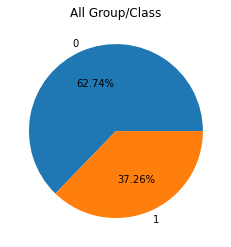

In [9]:
plot_pie('diagnosis')

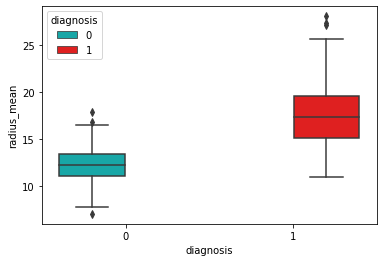

Median:
Negative: 12.2
Positive: 17.325000000000003


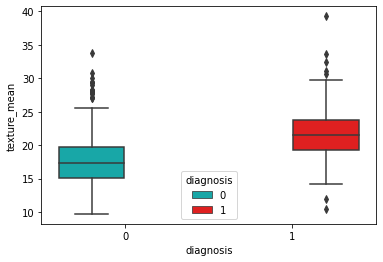

Median:
Negative: 17.39
Positive: 21.46


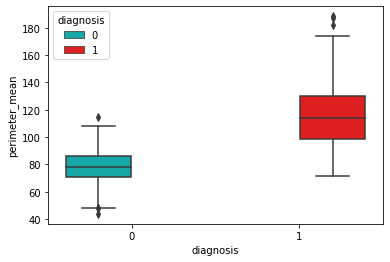

Median:
Negative: 78.18
Positive: 114.2


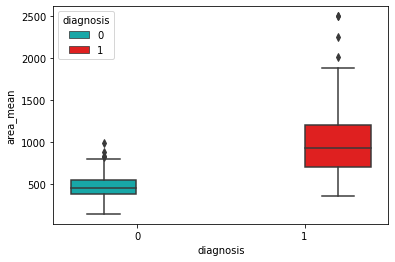

Median:
Negative: 458.4
Positive: 932.0


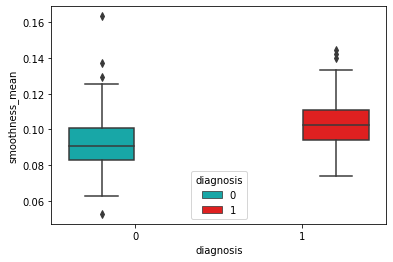

Median:
Negative: 0.09076
Positive: 0.1022


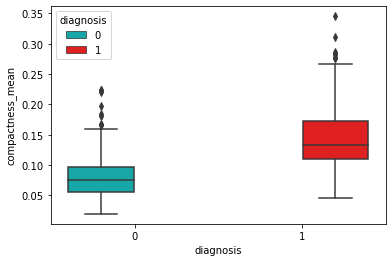

Median:
Negative: 0.07529
Positive: 0.13235


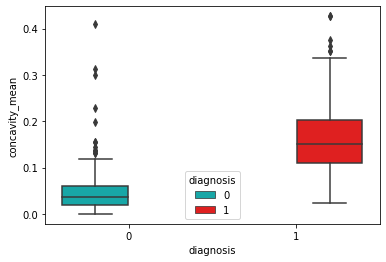

Median:
Negative: 0.03709
Positive: 0.15134999999999998


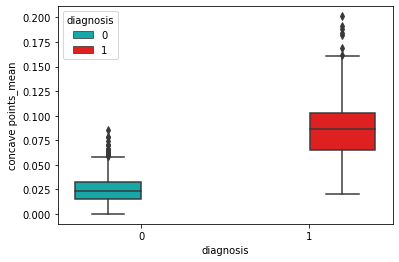

Median:
Negative: 0.02344
Positive: 0.08628


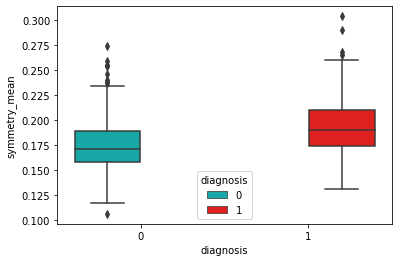

Median:
Negative: 0.1714
Positive: 0.1899


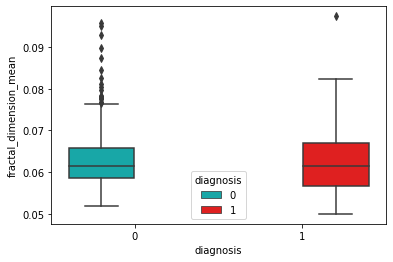

Median:
Negative: 0.06154
Positive: 0.061575000000000005


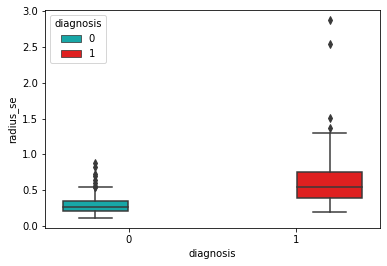

Median:
Negative: 0.2575
Positive: 0.5472


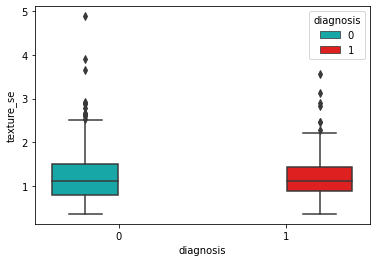

Median:
Negative: 1.108
Positive: 1.1025


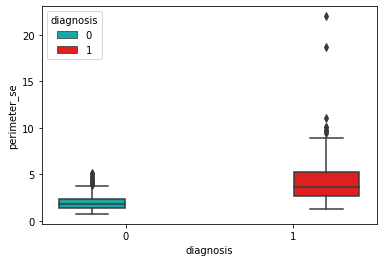

Median:
Negative: 1.851
Positive: 3.6795


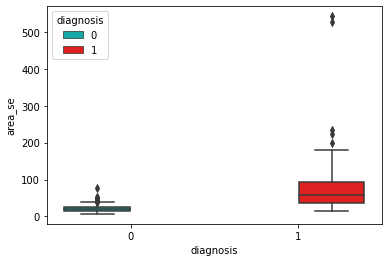

Median:
Negative: 19.63
Positive: 58.455


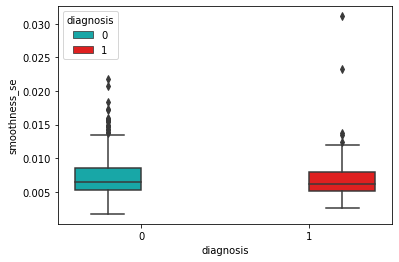

Median:
Negative: 0.00653
Positive: 0.0062095


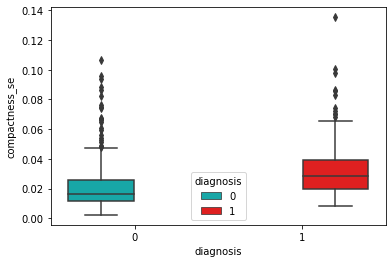

Median:
Negative: 0.01631
Positive: 0.028589999999999997


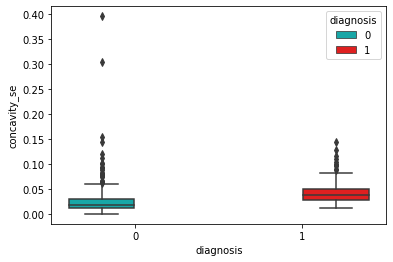

Median:
Negative: 0.0184
Positive: 0.037125000000000005


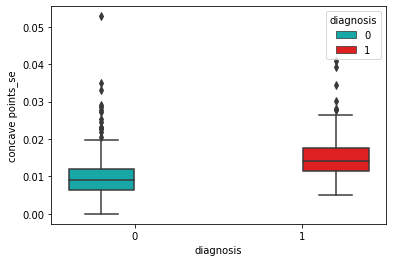

Median:
Negative: 0.009061
Positive: 0.014205


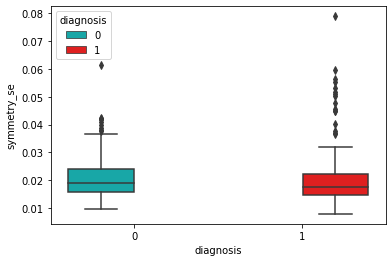

Median:
Negative: 0.01909
Positive: 0.0177


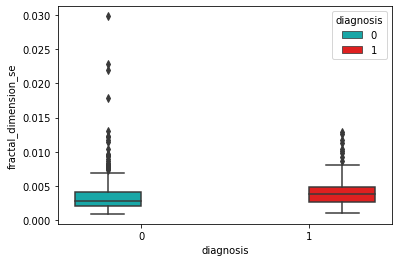

Median:
Negative: 0.002808
Positive: 0.0037394999999999998


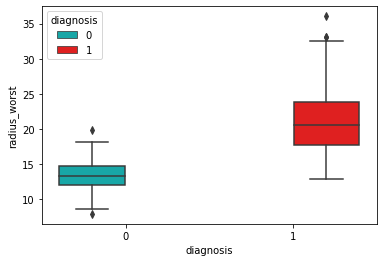

Median:
Negative: 13.35
Positive: 20.59


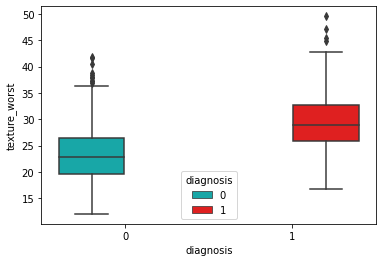

Median:
Negative: 22.82
Positive: 28.945


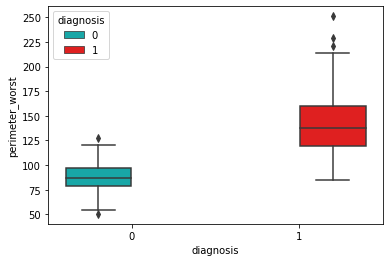

Median:
Negative: 86.92
Positive: 138.0


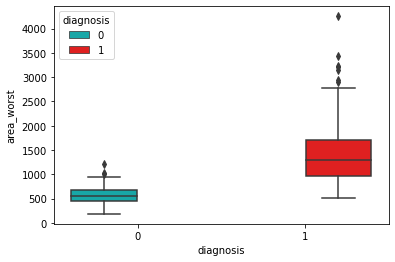

Median:
Negative: 547.4
Positive: 1303.0


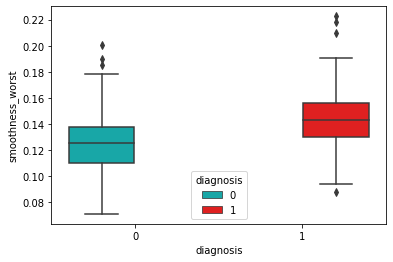

Median:
Negative: 0.1254
Positive: 0.14345


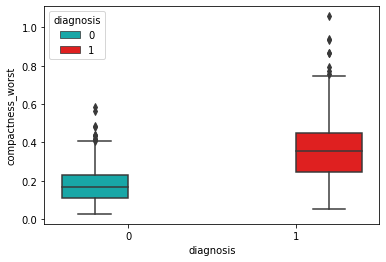

Median:
Negative: 0.1698
Positive: 0.35635


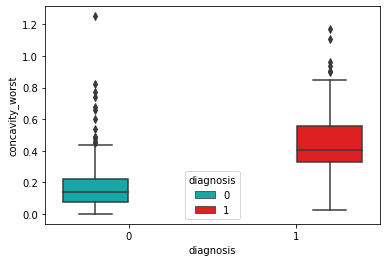

Median:
Negative: 0.1412
Positive: 0.4049


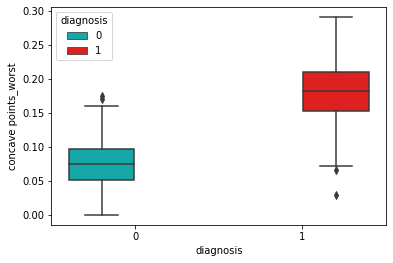

Median:
Negative: 0.07431
Positive: 0.182


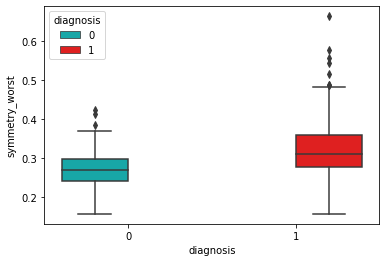

Median:
Negative: 0.2687
Positive: 0.3103


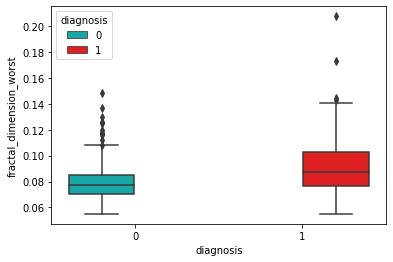

Median:
Negative: 0.07712
Positive: 0.08760000000000001


In [10]:
eda(df_all)

In [11]:
data = df.corr()

In [12]:
data = data.sort_values(by='diagnosis',ascending=False)
data['diagnosis']

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [13]:
data[data['diagnosis']>0.5].index

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se'],
      dtype='object')

In [14]:
X = df.copy()

y = X['diagnosis']

X = X.drop(['diagnosis'], axis=1)

In [15]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1234)

X_sm, y_sm = sm.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (569, 30)
Shape of X after SMOTE: (576, 30)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: diagnosis, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_sm = sc.fit_transform(X_sm)
X_test = sc.transform(X_test)

In [19]:
# Import ML Libraries
from sklearn.ensemble import RandomForestClassifier

classifiers = [[RandomForestClassifier(max_depth=5),'Random Forest Classifier']]

In [20]:
for cls in classifiers:
    model = cls[0]
    model.fit(X_sm, y_sm)
    
    y_pred = model.predict(X_test)
    print(cls[1])
    print ('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)
    print("Recall : ", recall_score(y_test, y_pred) *  100)
    print("Precision : ", precision_score(y_test, y_pred) *  100)
    print("F1 : ", f1_score(y_test, y_pred) *  100)
    print("ROC AUC : ", roc_auc_score(y_test, y_pred) *  100)
    print('\n\n')

Random Forest Classifier
Confusion Matrix:
[[67  2]
 [ 6 39]]
Accuracy :  92.98245614035088
Recall :  86.66666666666667
Precision :  95.1219512195122
F1 :  90.69767441860465
ROC AUC :  91.88405797101449



